In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
import time

In [2]:
start = time.clock()

x = 0.7
y = 0.25
learning_rate = 0.01

w = np.array([x,y])

w_x = []
w_y = []
f = []

while (w[0]+w[1]<1) and (w[0]>0) and (w[1]>0):
    energy = - np.log(1-w[0]-w[1]) - np.log(w[0]) - np.log(w[1])
    f.append(energy) 
    
    w_x.append(w[0])
    w_y.append(w[1])
    
    grad_x = 1/(1-w[0]-w[1]) - 1/(w[0])
    grad_y = 1/(1-w[0]-w[1]) - 1/(w[1])
    gradient = np.array([grad_x, grad_y])
    
    update = learning_rate * gradient
    
    if np.linalg.norm(w - np.subtract(w,update)) < 0.001:
        break
    else:
        w = np.subtract(w,update)

end = time.clock()
print ("Time taken for gradient descent: ", round((end-start), 4))

Time taken for gradient descent:  0.0062


C:\Users\kaush\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.
C:\Users\kaush\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


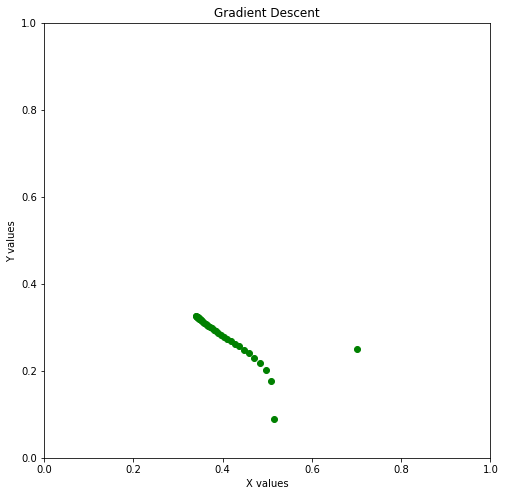

In [3]:
fig, ax = plt.subplots(figsize=(8,8))

plt.scatter(w_x, w_y, c = 'green')
plt.ylim([0,1])
plt.xlim([0,1])
plt.ylabel('Y values')
plt.xlabel('X values')
plt.title('Gradient Descent')

plt.show()

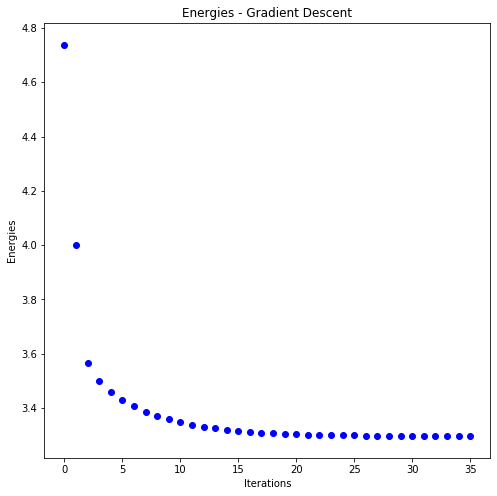

In [4]:
fig, ax = plt.subplots(figsize=(8,8))

plt.scatter(range(len(f)), f , c = 'blue')
plt.ylabel('Energies')
plt.xlabel('Iterations')
plt.title('Energies - Gradient Descent')

plt.show()

In [5]:
start = time.clock()

x = 0.7
y = 0.2
learning_rate = 1

w = np.array([x,y])

w_x = []
w_y = []
f = []

while ((w[0]+w[1])<1) and (w[0]>0) and (w[1]>0):
    energy = - np.log(1-w[0]-w[1]) - np.log(w[0]) - np.log(w[1])
    f.append(energy) 
    
    w_x.append(w[0])
    w_y.append(w[1])
    
    grad_x = 1/(1-w[0]-w[1]) - 1/(w[0])
    grad_y = 1/(1-w[0]-w[1]) - 1/(w[1]) 
    gradient = np.array([grad_x, grad_y])
    
    hessian_x1 = 1/((1-w[0]-w[1])*(1-w[0]-w[1])) + 1/(w[0]*w[0])
    hessian_y2 = 1/((1-w[0]-w[1])*(1-w[0]-w[1])) + 1/(w[1]*w[1])
    hessian_xy = 1/(1- w[0]-w[1]) * (1- w[0]-w[1])
    hessian = np.array([[hessian_x1, hessian_xy],[hessian_xy, hessian_y2]])
    
    update = learning_rate * np.matmul(inv(hessian), gradient)
    if np.linalg.norm(w - np.subtract(w,update)) < 0.00001:
        break
    else:
        w = np.subtract(w,update)

end = time.clock()
print ("Time taken for Newton's method: ", round((end-start), 4))

Time taken for Newton's method:  0.0018


C:\Users\kaush\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.
C:\Users\kaush\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


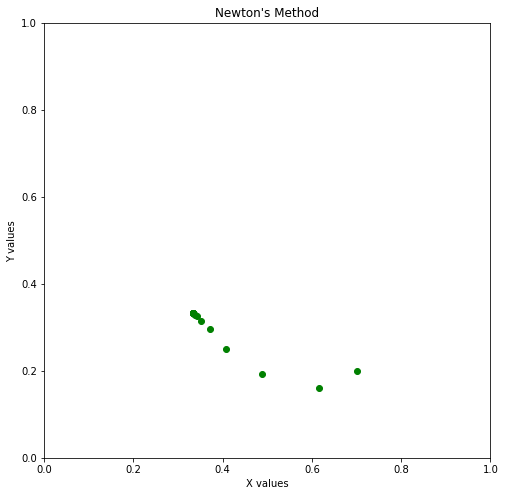

In [6]:
fig, ax = plt.subplots(figsize=(8,8))

plt.scatter(w_x, w_y, c = 'green')
plt.ylim([0,1])
plt.xlim([0,1])
plt.ylabel('Y values')
plt.xlabel('X values')
plt.title('Newton\'s Method')

plt.show()

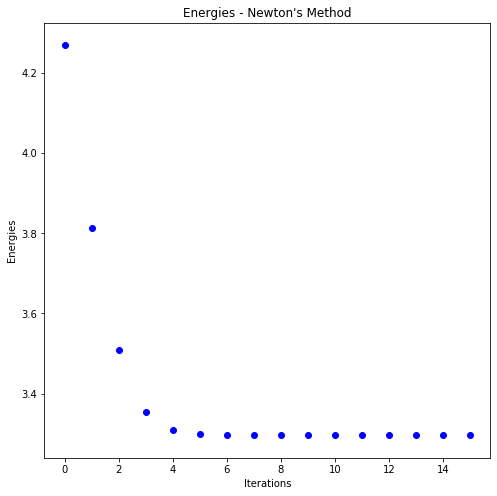

In [7]:
fig, ax = plt.subplots(figsize=(8,8))

plt.scatter(range(len(f)), f , c = 'blue')
plt.ylabel('Energies')
plt.xlabel('Iterations')
plt.title('Energies - Newton\'s Method')

plt.show()

Newton's method is 0.001 seconds faster than Gradient Descent.

The convergence speed may change from function to function.

Usually, Newton's method has inverse quadratic convergence compared to the inverse linear convergence of gradient descent.